## TFIDF classification

#### Dataset: [Kaggle Bag of Words meets Bag of Popcorns](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)

In [1]:
import pandas as pd
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3, encoding='utf-8')
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3, encoding='utf-8')

## Text cleaning

In [3]:
stop = set(stopwords.words("english"))
def clean_text(text):
    review_text = BeautifulSoup(text, "html5lib").get_text()
    letter_only = re.sub("[^a-zA-Z]"," ", review_text)
    words = letter_only.split()
    clean_text = [w for w in words if not w in stop]
    return(" ".join(clean_text))

In [4]:
train['review'][69]

u'"I really wanted to like this film, but the story is ridicules. I don\'t want to spoil this film, - don\'t worry right from the begin you know something bad is going to happen - but here\'s an example of how sloppy this film was put together. The Cowboy and \\"Twig\\" ride up the ridge. The Cowboy has a handle bar mustache. The Cowboy and \\"Twig\\" get into a shoot out and race half way down the ridge. The Cowboy is clean shaven through out the rest of the film. Sometime between the gun fight and the ride down the mountain the cowboy has had time to shave, in dark, on the back of a horse.<br /><br />To be fair, the acting by the four main characters is solid."'

In [5]:
clean_text(train['review'][69])

u'I really wanted like film story ridicules I want spoil film worry right begin know something bad going happen example sloppy film put together The Cowboy Twig ride ridge The Cowboy handle bar mustache The Cowboy Twig get shoot race half way ridge The Cowboy clean shaven rest film Sometime gun fight ride mountain cowboy time shave dark back horse To fair acting four main characters solid'

In [6]:
clean_train_reviews = []
clean_test_reviews = []

for i in xrange(train["review"].size):
    if (i+1)%1000 == 0:
        print i+1
    clean_train_reviews.append(clean_text(train["review"][i]))

for i in xrange(test["review"].size):
    if (i+1)%1000 == 0:
        print i+1
    clean_test_reviews.append(clean_text(test["review"][i]))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


## Initializing TFIDF Vectorizer

In [7]:
tfidf = TfidfVectorizer(min_df=3, 
                        max_features=1000, 
                        strip_accents='unicode', 
                        analyzer='word', 
                        ngram_range=(1, 2), 
                        use_idf=1, 
                        smooth_idf=1, 
                        sublinear_tf=1)

In [8]:
train_data_features = tfidf.fit_transform(clean_train_reviews)
test_data_features = tfidf.transform(clean_test_reviews)

In [9]:
print train_data_features.shape
print test_data_features.shape

(25000, 1000)
(25000, 1000)


In [10]:
train_labels = train["sentiment"]

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [12]:
train_labels = np_utils.to_categorical(train_labels, 2)

## Baseline Model (Softmax)

In [13]:
model = Sequential()
model.add(Dense(input_shape=(1000,), units=2))
model.add(Activation('softmax'))

In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy', 'binary_accuracy'])

history = model.fit(train_data_features.toarray(), train_labels, 
                    validation_split=0.2,
                    verbose=2)
# Even at 1,000 epochs the max validation accuracy it gives is 0.82

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
0s - loss: 0.6864 - acc: 0.5837 - binary_accuracy: 0.5837 - val_loss: 0.6826 - val_acc: 0.6302 - val_binary_accuracy: 0.6302
Epoch 2/10
0s - loss: 0.6783 - acc: 0.6667 - binary_accuracy: 0.6667 - val_loss: 0.6749 - val_acc: 0.7022 - val_binary_accuracy: 0.7022
Epoch 3/10
0s - loss: 0.6706 - acc: 0.7205 - binary_accuracy: 0.7205 - val_loss: 0.6676 - val_acc: 0.7456 - val_binary_accuracy: 0.7456
Epoch 4/10
0s - loss: 0.6631 - acc: 0.7586 - binary_accuracy: 0.7586 - val_loss: 0.6608 - val_acc: 0.7574 - val_binary_accuracy: 0.7574
Epoch 5/10
1s - loss: 0.6559 - acc: 0.7776 - binary_accuracy: 0.7776 - val_loss: 0.6539 - val_acc: 0.7824 - val_binary_accuracy: 0.7824
Epoch 6/10
1s - loss: 0.6490 - acc: 0.7925 - binary_accuracy: 0.7925 - val_loss: 0.6472 - val_acc: 0.7950 - val_binary_accuracy: 0.7950
Epoch 7/10
1s - loss: 0.6423 - acc: 0.8019 - binary_accuracy: 0.8019 - val_loss: 0.6410 - val_acc: 0.8028 - val_binary_accuracy: 0.8028

In [15]:
print history.history.keys()

['acc', 'loss', 'val_binary_accuracy', 'binary_accuracy', 'val_acc', 'val_loss']


### Train and validation accuracy

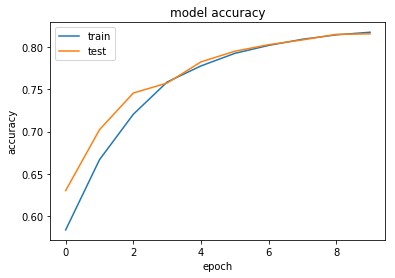

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Train and Validation loss

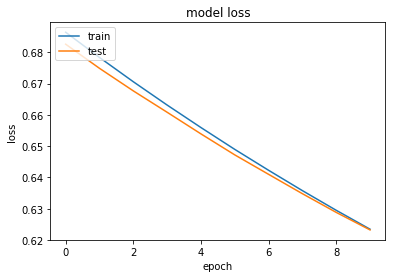

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## FC + RELU + RELU + FC + Softmax (MLP)

In [13]:
model = Sequential()
model.add(Dense(input_shape=(1000,), units=512))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy', 'binary_accuracy'])

history = model.fit(train_data_features.toarray(), train_labels, 
                    validation_split=0.2,
                    verbose=2, epochs= 50)
# Max accuracy at 25 epochs is 85.76

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
4s - loss: 0.6899 - acc: 0.5603 - binary_accuracy: 0.5603 - val_loss: 0.6854 - val_acc: 0.6160 - val_binary_accuracy: 0.6160
Epoch 2/50
5s - loss: 0.6805 - acc: 0.6791 - binary_accuracy: 0.6791 - val_loss: 0.6758 - val_acc: 0.7002 - val_binary_accuracy: 0.7002
Epoch 3/50
5s - loss: 0.6686 - acc: 0.7419 - binary_accuracy: 0.7419 - val_loss: 0.6622 - val_acc: 0.7628 - val_binary_accuracy: 0.7628
Epoch 4/50
4s - loss: 0.6525 - acc: 0.7783 - binary_accuracy: 0.7783 - val_loss: 0.6443 - val_acc: 0.7892 - val_binary_accuracy: 0.7892
Epoch 5/50
4s - loss: 0.6311 - acc: 0.7973 - binary_accuracy: 0.7973 - val_loss: 0.6207 - val_acc: 0.8004 - val_binary_accuracy: 0.8004
Epoch 6/50
4s - loss: 0.6039 - acc: 0.8067 - binary_accuracy: 0.8067 - val_loss: 0.5920 - val_acc: 0.8120 - val_binary_accuracy: 0.8120
Epoch 7/50
5s - loss: 0.5722 - acc: 0.8158 - binary_accuracy: 0.8158 - val_loss: 0.5616 - val_acc: 0.8102 - val_binary_accuracy: 0.8102

### Train and validation accuracy

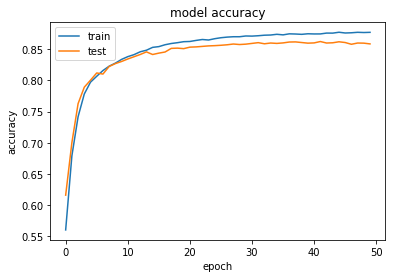

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Train and validation loss

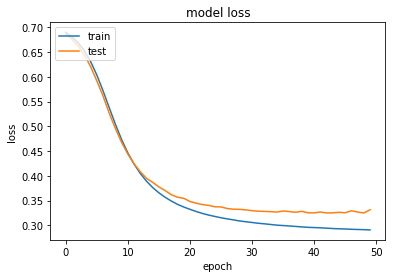

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')